# Introduction to Machine Learning<br><br>Day 02:<br>Topic Modeling

<center>Dr. William Mattingly<br>
TAP Institute with JSTOR</center>

## Preface

In the last notebook, we learned about some of the fundamental concepts and terms for engaging in machine learning. In this notebook, we begin to apply those concepts to an unsuperivsed learning problem: topic modeling. This is an unsupervsed learning problem because we will not know the number of topics found within our corpus. Instead, we want to create a model that will cluster the data and find topics (based on a number we assign) across an entire corpus. This notebook is not designed as a course on topic modeling, rather as an introduction to the process of unsupervised learning. I am a firm believer that the best way to understand a new topic is to jump in and engage in that topic. If you are interested in topic modeling more deeply after hearing about it here, I recommend exploring the other TAP Institute course on Topic Modeling.

## Covered in this Notebook

1) What is topic modeling?<br>
2) When should I use topic modeling?<br>
3) Clusters<br>
4) Topics<br>
5) The Gensim Library in Python

## Background on Unsupervised Learning

In case you have forgotten from the last notebook, there are several different ways that we can train machine learning models. The first (explored in this notebook) is unsupervised learning. Another is supervised learning (the following notebook). Another common method is reinforcement learning (not explored here).

In this notebook, we will be engaging in unsupervised learning. In this scenario, we do not have labeled data. It is our goal to use a machine learning system to identify patterns in the data and generate the labels for us. Topic Modeling, as we shall see, is an unsupervised learning problem.

Unsupervised learning is more commonly used outside of text analysis. It is used by a wide array of disciplines. Let's briefly consider this fun toy example in text (rather than graph and data) form.

Imagine that we need to understand what makes certain animals related. We don't know what these animals are, but we want to know if there are patterns that can allow us to identify the types of animals we are looking at. We only know three things about these animals: (1) number of feet; (2) presence of wings; (3) color. It is our goal to use these features to identify two types of animals.

Let's say we have four animals:

Animal 1 has two feet, wings, and is white.<br>
Animal 2 has two feet, wings, and is brown.<br>
Animal 3 has four feet, no wings, and is white<br>
Animal 4 has four feet, no wings, and is gray.<br>

If we were to cluster these four animals, we as humans could easily place Animal 1 and Animal 2 in a similar category and Animal 3 and Animal 4 in a different one. We can see from these features that color has very limited relevance to cluster these animals because, as we can see, Animal 1 and Animal 3 have the same color, but are different in other features. We as humans from simply reading these descriptions can classify these animals into two distinct categories. Type 1 and Type 2. Type one has four legs and no wings, while Type 2 has two legs and wings. Both types may appear in various colors. At its core, this is an unsupervised learning problem. We do not know the types of animals, but we know the data related to them. We identify patterns and then cluster those data about the animals into two distinct categories.

What if we introduce a new animal into the mix, the elusive Animal 5, just recently discovered.

Animal 5 has four feet, wings, and is white. (Spoiler Alert: It's Pegasus)

Were we to try and classify this animal, we now have a problem, right? It doesn't fit the patterns of the others. It may have the same color, but as we've learned color is not a great feature for classifying our animals. It has a feature from category 1 (four legs) and a feature from category 2 (wings). So, what do we do with it? In an unsupervised learning problem, we may need to adjust our parameters and allow for three types of animals.

Let's consider a fake dataset that I have cultivated for this notebook. We have similar data now in "data/animals.csv". For now, let's work with two pieces of data: feet_size and wing_length. Let's plot the data and see what we can learn about this data.

In [29]:
import pandas as pd
pd.options.plotting.backend = "plotly"

df = pd.read_csv("data/animals.csv")
fig = df.plot.scatter(x="Feet Size", y="Wing Length")
fig.show()

Each plot point is a unique animal in our dataset. Using just our eyes, we can identify groupings, or clusters within this data. How many clusters can you identify?

For me, I see one cluster in the bottom left, another in the center and a final one (though dispersed) in the top right. This data was entirely randomized but the random numbers chosen were in three distinct categories. Let's see what those categories look like now by applying color to the same graph.

In [30]:
fig = df.plot.scatter(x="Feet Size", y="Wing Length", color="Animal")
fig.show()

In this case, we knew the number of clusters because we new the number of different animals in the dataset. In a real-world example, this may not be the case. In unsupervised learning, we do not know the labels or number of clusters. Instead, we need to figure out which features are good at predicting groupings (if at all) in our data.

Let's now allow an unsupervised learning algorithm known as K-Means to replicate this human process. To do this, we will use the library Scikit Learn

In [26]:
#modified from https://towardsdatascience.com/a-brief-introduction-to-unsupervised-learning-20db46445283
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = make_blobs(n_samples=500, centers=5, cluster_std=1, random_state=20)

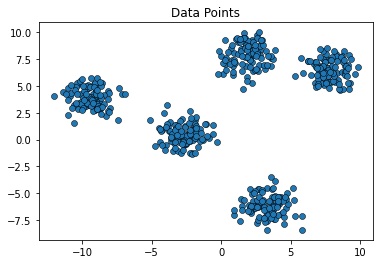

In [27]:
# Setting scatter plot title.
plt.title('Data Points')

# Show the scatter plot of the data points.
plt.scatter(data[0][:,0], data[0][:,1], edgecolors='black', linewidths=.5);

plt.show()

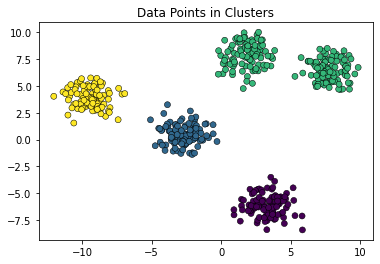

In [28]:
# Creating algorithm and setting it's parameters.
K_Means = KMeans(n_clusters=4)

# Training - "Fitting to the data".
K_Means.fit(data[0])

# Make predictions.
clusters = K_Means.predict(data[0])

# Setting scatter plot title.
plt.title('Data Points in Clusters')

# Show scatter plot - The color (c) is determined by the clusters.
plt.scatter(data[0][:,0], data[0][:,1], c=clusters, edgecolors='black', linewidths=.5)

plt.show()

Here we used the K-Means algorithm to try and identify four clusters, despite the fact that we used the make_blobs to generate five clusters. As we can see, by defining how we want the algorithm to output the data, we can force the algorithm to cluster the top right clusters into a single cluster. This is done based on the degree of overlap between these two distinct groups. If, however, we were unhappy with this results, we could rerun the algorithm and ask it to identify 5 clusters. The output would then look like this:

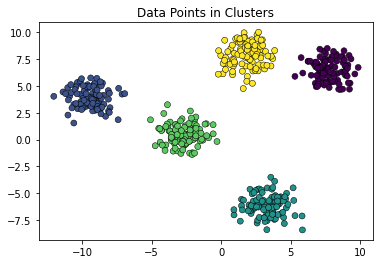

In [29]:
# Creating algorithm and setting it's parameters.
K_Means = KMeans(n_clusters=5)

# Training - "Fitting to the data".
K_Means.fit(data[0])

# Make predictions.
clusters = K_Means.predict(data[0])

# Setting scatter plot title.
plt.title('Data Points in Clusters')

# Show scatter plot - The color (c) is determined by the clusters.
plt.scatter(data[0][:,0], data[0][:,1], c=clusters, edgecolors='black', linewidths=.5)

plt.show()

As I hinted in the last notebook and as we will see here again, text is far more complex than other machine learning problems because language is inherently more complex. When we think of features in language, we need to think of words, how they are used, and in what contexts. Each word constitutes a specific feature of language and its use needs to be represented numerically. We can achieve the latter with the word embedding we met in the last notebook, but capturing the former is mathematically complex.

In this notebook, we will delve a bit deeper into text and machine learning by presenting and solving an unsupervised learning problem known as topic modeling. As we will see, it works similarly to the problem we saw above, though it is magnitudes more complex. We have the data, but we don't know the types (clusters or topics) that exist within that data. It is the unsupervised learning algorithm's job to find those hidden (latent) themes using nothing more the text of an entire corpus.

## Part One - What is Topic Modeling?

Topic modeling and text classification (addressed in the next notebook) are collectively known as "text categorization" which is a branch of natural language processing, better known as NLP. It is closely connected to natural language understanding, better known as NLU. NLP is the process by which a researcher uses a computer system to parse human language and extract important metadata from texts. The purpose of NLP is to perform, among other things, distant reading.

Distant reading has a long history extending to the late-twentieth century. It is commonly used when the quantity of texts in a given corpus prevent a researcher (or a team of researchers) from reading the corpus closely in its entirety. In order to make sense of that large corpus, the researcher will often pass certain tasks to a computer with the understanding that there is a margin of error. This margin of error is accepted in exchange for the ability to gain a larger, distant understanding of that corpus.

The metadata from these tasks can then be used to get a sense of the texts without reading them closely, hence the term distant reading.

To get a better understanding of how these fields relate to one another, please see the image below.

<img src="https://cdn-images-1.medium.com/max/1000/1*Uf_qQ0zF8G8y9zUhndA08w.png" alt="fishy" class="bg-primary" width="700px">

This image is commonly shared across various NLP tutorials and for good reason. It accuarately portrays the diverse field of NLP and its close partner fields of NLU and ASR. The goal of NLU is to give a computer system a text (or collection of texts) and produce some sense of understanding about that text or those texts.

There are various types of tasks that fall under NLU, including paraphrase and natural language inference. This is when a computer system takes an input text of, say 5,000 words, reduces that text to its core components, and outputs a summary of the text. This is a task often used by law firms that need to gain a quick understanding of a large corpus of documents to target their investigation and use their time wisely. Another task is sentiment analysis in which a user gives a computer system a text and the system determines whether it is x or y. This is often used by social media companies to determine if a text is abusive so that they can flag and delete inappropriate content automatically.

A common form of NLP and the subject of these notebooks is topic modeling and text classification. While closely linked and rather similar, they are distinct methods that perform distinct tasks. For topic modeling, we give a computer system a text and it tells us what topic(s) is (are) discussed in it. For text classification, we give a system a text and it classifies it into certain categories. In essense, while NLP is essential for working with textual data in a computer environment by parsing it and identifying its key components, NLU goes one step further and tries to understand that same data the way a human may.

For all NLP and NLU tasks, there are rules-based and machine learning-based approaches. In this notebook, we will be looking at each. Parts Two and Three in this book are focused on clustering and topic modeling. In Part Two, we will explore rules-based methods, such as Term Frequency-Inverse Document Frequency, better known as TF-IDF; and in Part Three we will explore machine learning-based methods, specifically Latent Dirichlet Allocation models, better known as LDA models.

Before we move into those subjects, something should be said of rules-based vs. machine learning-based approaches.

A rules-based approach to topic modeling uses a set of rules to extract topics from a text. It does this by identifying keywords in each text in a corpus. One of the most common ways to perform this task is via TF-IDF, or term frequency-inverse document frequency We will not address TF-IDF in these notebooks in great detail, but you should be aware that other non-ML approaches are available and should be used in certain situations. Simply put, a TF-IDF looks for a word’s frequency in a single text, respective to that word’s use across the corpus as a whole. If that word occurs infrequently in all other documents, but frequently in one document, then we use rules to identify the document that sees one word used with a high frequency as the chief document of a given topic.

For certain problems, a rules-based approach is particularly useful and appropriate with documents that are shorter, such as tweets.

Another option to identify topics in a text is via a machine learning-based approach. In this method, we do not give a computer system a set of rules, rather we let the computer generate its own rules to identify topics in a corpus. This is done in two different ways: supervised and unsupervised learning.

In supervised learning, we know the key subjects in a corpus. We give a computer system a set of documents with their corresponding label to teach it to identify the characteristics that make that particular topic or class unique. This is mostly used for text classification.

Another approach is via unsupervised learning. In unsupervised learning, we do not know the topics of our documents and, instead, we want let the system identify those topics and cluster the ones of a highd degree of similarity together. We then examine the words that occur the most frequently in each cluster to get a sense of the topics at hand. The classic example for machine learning topic modeling is LDA, or Latent Dirichlet Allocation. We will learn about this method in far more detail in Part Three.

## Part Two - When to Use Topic Modeling

All of this leads to a vital question: Why use topic modeling? Topic modeling affords researchers the ability to learn a lot about their corpus very quickly. It is often used whent the corpus is so large that no single human could read it in a single lifetime.

In both a rules-based and machine learning-based approach, a researcher can see what major subjects are discussed in a corpus. This information can be used to perform targetted research by weeding out the documents that likely do not contain the information the researcher needs. Additionally, the information drawn from topic modeling can be used to make large deductions about the corpus at hand. We will see that topic modeling can be used to draw imprecise or incorrect conclusions.

It is vital, however, to understand the limitations of topic modeling. There is always a potential for the researcher to use topic modeling to validate a wrong presumption about the data. Throughout this series, I will emphasize methodological steps that can (and should) be taken to limit these mistakes. Despite this potential for error, topic modeling can provide valuable insight, relatively quickly about a large corpus.

## Part Three - What are Clusters and Topics?

The goal of topic modeling is to assign topics to a large corpus with each document recieving one topic. <u><b>Topics</b> are labels assigned to textual data that detail the subjects contained within a given text.</u> In topic modeling we try to create computer systems that can assign topics the way a human would. In order to understand this process, it’s best if we take a step back and think about how we assign topics.

To do this, let’s examine these two texts.

Text 1: Thomas enjoys playing basketball. He is an exceptionally good point guard.<br>
Text 2: Victoria enjoys playing baseball. She is an exceptionally good at playing first base.

If I asked you to provide two topics to these texts, what might they be? Basketball and baseball are likely two top candidates. Text 1 would have the topic of basketball, while text 2 would have the topic of baseball. Now, let’s consider these same texts, but add two more into the mix.

Text 3: John is a talented chef. He enjoys making pasta professionally.<br>
Text 4: Jeff is a talented cook. He owns a pizzaria.

Now, if I asked you to assign two topics to all four texts, what might those topics be? It is likely that your answer changed. No longer are the two topics of baseball and basketball relevant because Text 3 and Text 4 do not align well with those topics. Instead, a better pair of topics might be sports and cooking, or something like that. What changed? The collection of texts in our corpus changed.

What does this demonstrate? It tells us that topics are corpus-dependent, meaning the topics we assign to texts depend on their context against surrounding texts. The same holds true for topic modeling via computer systems.

In topic modeling, computer systems do not generate topics, rather they generate a list of high concentration words. Texts that share common terms are clustered together by similarity. A cluster is nothing more than a collection of similar texts.

## Part Four - Introduction to Gensim

Gensim is a powerful Python library that was originally designed to produce good topic models. Topic models are machine learning models that read over an entire corpus and cluster individual documents into clusters of similarity. In order to produce good results, Gensim (and other topic modeling methods) are reliant upon numerical represntations of words. In other words, these methods depend on word vectors. To have accurate results, therefore, Gensim is capable of generating word vectors with relatively minimal code. SpaCy, on the other hand, is an NLP library not capable of generating custom word vectors. While users can inject to words into models, spaCy is not designed to generate word vectors on its own. For this reason, even spaCy’s documentation recomends using other libraries, such as Gensim to generate word vectors.

In this notebook, we will be going through the process of generating our own word vectors. In order to reduce the time to perform the task at hand, we will use a toy corpus. This process, however, can easily be scaled for a corpus of millions of documents.

In order to generate word vectors, we need one thing: a corpus/ Let’s create one right now.

In [ ]:
corpus = "Tom is cat, while Jerry is a mouse. Tom and Jerry are characters in a cartoon series. Some of the cartoons contain words, but most are silent. Silent cartoons still have music and sound effects."

Before we can give this corpus to Gensim, however, we need to do a few preprocessing techniques to it.

1. First, we need to remove the stopwords from the corpus. Stopwords are words that occur frequently in a corpus, so frequently that they do not necessarily offer much meaning for distant reading and, as a result, throw off machine learning models. Other stopwords are words that occur with high frequency in a langauge as a whole. For our purposes, we will use the following stopwords available from the NLTK (natural language toolkit)

In [ ]:
stopwords = ["i","me","my","myself","we","our","ours","ourselves","you","your","yours","yourself","yourselves",
             "he","him","his","himself","she","her","hers","herself","it","its","itself","they","them","their",
             "theirs","themselves","what","which","who","whom","this","that","these","those","am","is","are","was",
             "were","be","been","being","have","has","had","having","do","does","did","doing","a","an","the","and",
             "but","if","or","because","as","until","while","of","at","by","for","with","about","against","between",
             "into","through","during","before","after","above","below","to","from","up","down","in","out","on","off",
             "over","under","again","further","then","once","here","there","when","where","why","how","all","any","both",
             "each","few","more","most","other","some","such","no","nor","not","only","own","same","so","than","too","very",
             "s","t","can","will","just","don","should","now"
            ]
corpus = corpus.lower()
words = corpus.split()

new_corpus = []
for word in words:
    if word not in stopwords:
        new_corpus.append(word)

corpus = " ".join(new_corpus)
print (corpus)

2. Second, this corpus should be divided into sentences. In order to do that, I recommend using spaCy’s sentence tokenizer.<br>
3. While we do this, we should also eliminate the punctuation from the sentences. We can do this with the standard string library from Python.<br>
4. Also at this stage, we should lowercase our words (OPTIONAL)<br>
4. If we wish to produce a smaller amount of word vectors, we could also consider lemmatizing our words as well (OPTIONAL)<br>
5. We need to split the sentence into words and append that list of words to a new object

In [ ]:
# Install spaCy
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

In [ ]:
import spacy
import string

nlp = spacy.load("en_core_web_sm")
doc = nlp(corpus)

sentences = []
for sent in doc.sents:
    sentence = sent.text.translate(str.maketrans('', '', string.punctuation))
    words = sentence.split()
    sentences.append(words)
print (sentences)

## Part Five - Creating Word Vectors

At this stage, we can start preparing our word vectors. To do this, we will use the function below.

In [ ]:
def create_wordvecs(corpus, model_name):
    from gensim.models.word2vec import Word2Vec
    w2v_model = Word2Vec(min_count=1)
    w2v_model.build_vocab(sentences)
    w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
    w2v_model.wv.save_word2vec_format(f"data/{model_name}.txt")
create_wordvecs(sentences, "word_vecs")

Now, we can open up our word vectors and examine them. The first line in this text file will be the shape of the word vectors. This should be two integers. The first number (17) is the number of unique words in the vocabulary. The second number (10) are the number of dimensions of each word.

In [ ]:
with open ("data/word_vecs.txt", "r") as f:
    data = f.readlines()
    print (data[0])

Let’s look at the first word in our word vectors, “silent”:

In [ ]:
 print (data[1])

Here, we see two pieces of information. The first is a string and it is the word itself. In this case, “silent”. The second bit of data is a series of 10 floats. These are our dimensions for the word. This is the numerical way in which “silent” is understood by the Gensim model.

## Part Six - Topic Modeling with Gensim

With these understandings now down, it is time to engage in topic modeling with Gensim. To do this, we will use a sample dataset known as the 20-newsgroups dataset. In what follows, we will largely follow the standard Gensim tutorial: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/ with significant modifications. My modifications are designed to reduce the complexity of topic modeling for entry-level students. I have also updated the visualization code.

For our purposes, we will be using a topic model known as an LDA Topic Model. LDA stands for Latent Dirichlet Allocation. This name may be a bit scary at first, but a good way to think of it as a way to identify latent, or hidden, topics in a text.

We first need to load in the data. To do that, we will use Pandas and its built in read_json() function. This will allow us to grab the data from the internet and automatically format it for us to work with it in Python.

In [ ]:
import pandas as pd
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')

Now that we have the we have the data loaded, let's convert it to a list.

For those unfamiliar or new to data analysis, you will find that the majority of your time is spent cleaning datasets or preparing uncultivated data to fulfill specific purposes. This dataset, despite being well-cultivated, is no exception. We need to clean it and isolate the essential message that we wish to perform topic modeling on.

To do this, let's examine a sample item from this dataset.

In [ ]:
news_data = df.content.values.tolist()
print (news_data[1])

Each item in the dataset will have some preliminary header data (which we do not need), separated by a double line break. That which comes after the double line break is the key piece of the message that we are interested in. We are also not interested in email addresses. With this bit of information, we can write a few rules to remove the header and clean up the data. In addition to that, we can leverage the power of Gensim's built in simple_preprocess() function that allows us to easily clean and structure texts for topic modeling.

For those familiar with Python, the code below may look exceptionally long. The code that follows is not what I would call "efficient" nor is it the most Pythonic way to achieve the tasks at hand. It is, however, easier to parse for new coders. I have, therefore, opted to not use list comprehension and be more verbose in my code so that all readers will be able to more easily follow along.

In [ ]:
import re
from gensim.utils import simple_preprocess
final = []
for item in news_data:
    #separate the header from the main body of the text
    item = item.split("\n\n", 1)[1]
    
    #remove all email addresses with Regex
    item = re.sub('\S*@\S*\s?', '', item)
    
    #create a list of words by removing all non-text material, specifically punctuation and numbers
    words = simple_preprocess(item)
    
    #create an empty list to append to
    final_words = []
    
    #make sure all the words are not stopwords (the list we created above)
    for word in words:
        if word not in stopwords:
            
            #eliminate short words. This dataset has a lot of "rx", "rz", etc. data that may throw off the model.
            if len(word) > 3:
                words = final_words.append(word)
    final.append(final_words)
print (final[1])

Our dataset now is properly cleaned and in the format Gensim expects. Now, it's time to create a model. We will not be finetuning this model or exploring all the various hyperparameters available to researchers. Instead, we will create a basic model. I always like to do this as a first pass with my topic modeling.

In [ ]:
import gensim
import gensim.corpora as corpora
id2word = corpora.Dictionary(final)
corpus = [id2word.doc2bow(text) for text in final]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=20, chunksize=100, passes=10)

In [ ]:
topics = lda_model.print_topics()
for topic in topics:
    print(topic)

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

In [ ]:
vis

pyLDAvis allows us to easily interpret the model's results. We can see that through unsupervised learning the model has found for us the desired 20 clusters (or topics) of data. It now falls on us, as the rersearcher, to interpret these clusters. If I were to assign a label to Cluster 7, for example, I might assign the word "religious". This is because the words that are associated with cluster 7 are clearly religious in nature. Cluster 9, likewise, deals with sports. Cluster 8 deals with encryption.

## Part Eight - Improving an LDA Model

### Lemmatization

One of the notable problems with this result is the different conjugation forms of stop words, specifically the verb "to be". This can be seen in the high priority of Cluster 4 with the word "would". One of the ways to improve results is through something known as lemmatization, or the reduction of a word to a specific root, or lemma. This takes all the forms of a specific verb or noun and reduces them to a single standard form. The verbs "would", "was, and "am", therefore, all become "is" in lemmatization. Likewise, the words "teams" and "team" become "team". Lemmatization reduces a text further and typically improves the results.

Lemmatization can, however, be computationally expensive.

### Bigrams and Trigrams

Another noticable problem with the above approach iis that every word used to perform clustering is singular. We know that words used collectively have different meanings than their individual counterparts.

Let’s take a moment and step away from the subject of this textbook, topic modeling. Instead, let’s think about language, the essential medium of topic modeling. This notebook will be exclusively about one aspect of langauge: bigrams and trigrams. When we use words, those words correspond to something distinct.

If I use the word apple, you likely are thinking of something like this:

In [ ]:
from IPython.display import Image
Image("https://images-na.ssl-images-amazon.com/images/I/81Dl5GdAVkL.png")

Apple is a simple word, yet it can mean different things in different contexts. What if I said the following: “My Apple is better than a PC.” Now, what image comes to mind? Perhaps this?

In [ ]:
Image("https://images-na.ssl-images-amazon.com/images/I/71pheYd9W0L._AC_SL1500_.jpg", width=300)

This is an example of textual ambiguity. Syntactical context helps eliminate textual ambiguity. Apple is a single word here that contains a single concept. It's a relatively simple word. Perhaps one of the earliest a native speaker of English learns as a child. And yet it has textual ambiguity. Because "apple" is a single word, it is known as a unigram. A **unigram** is a single word that represents a single concept.
Textual ambiguity, however, occurs in more dynamic ways when we think about concepts beyond the single span of a single word. In this notebook, we will focus on two such cases that are essential for natural language processing: bigrams and trigrams. Bigrams are two words that contain a distinct meaning when used together, while trigrams are three words that contain a distinct meaning when used together.

Understanding bigrams and trigrams are essential because in order for a computer to truly understand langauge the way a human does, it must be able to understand the nuances of a single word and how a word’s meaning not only shifts in context, but shifts in meaning when used in conjunction with other words.

As noted above, a bigram is a combination of two words that have a distinct meaning. To demonstrate this, let us consider quickly the word “French”. A single word, that may have multiple meanings. Perhaps the word French refers to the language:

In [ ]:
Image("https://www.unb.ca/cel/_assets/images/enrichment/ll-fred/ll-french-beginners.jpg", width=500)

Perhaps it references a French person:

In [ ]:
Image("https://images.movehub.com/wp-content/uploads/2017/09/15150656/living-in-france.jpg")

Let's hold off on the word French for just a moment. Let's now use the word "revolution". Again, there is textual ambiguity, but perhaps I am referencing the concept of revolution in the sense of the Earth.

In [ ]:
Image("https://i.ytimg.com/vi/CqkQv617bcw/maxresdefault.jpg")

Now you may already see where I am going with this, but let’s now think about what happens when I put those two textually ambiguous unigrams together “The French Revolution”. “The” here is a stop word that is frequently dropped in natural language processing, so “French Revolution” is all that we should consider. This two words when combined have a distinct concept. Now, you may be thinking of this:

But we can think about language in even more nuanced ways.

Trigrams, as noted above, are the same as bigrams, except with three words, instead of two. Let’s continue with our example of “French”. What might you think about if I used the word “army”. Perhaps something distinct to your own experiences with the word. For me, as a modern American, I think initially about the American Army in the modern sense of the word. So I may picture something like this:

In [ ]:
Image("https://www.goarmy.com/content/dam/goarmy/refresh/redesign-nav-images/Desktop_Navigation_IMG_1.jpg")

For others in other parts of the world, other images may be more relevant. However, when I use the phrase "The French Revolutionary Army", I now have something defined, something distinct. I have this:

In [ ]:
Image("https://upload.wikimedia.org/wikipedia/commons/4/47/Bataille_Jemmapes.jpg")

This is a trigram, a distinct concept consisting of three words that may have individual meanings when used alone.

So, why are bigrams and trigrams so important? The reason comes down to getting machines to understand that when certain words are used together, they bear a distinct meaning. In order to produce a good topic model, therefore, the model must be able to understand and process words in this manner, the way we humans use the language we are trying to get the machine to understand.